## Predict Student Performance


#### Life cycle of Machine learning Project

- Problem Statement Analysis
- Data Acquisition
- Data Quality Assessment
- Exploratory Data Analysis (EDA)
- Data Cleaning & Preprocessing
- Model Development & Training
- Model Selection & Optimization

### **1) Problem Statement**
- This project analyzes the impact of various factors—such as gender, ethnicity, parental education level, lunch type, and test preparation course—on students' academic performance (test scores).


### **2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dataset comprises 1,000 rows and 8 columns, capturing key attributes influencing student outcomes.

#### Import Required Packages and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import data as Pandas Dataframe and view shape and data

In [2]:
df = pd.read_csv('data/stud.csv')
df.shape
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Dataset information

- **gender** : Sex of students → *(Male / Female)*  
- **race/ethnicity** : Ethnic background of students → *(Group A, B, C, D, E)*  
- **parental level of education** : Highest education level attained by parents →  
  *(Bachelor's degree, Some college, Master's degree, Associate's degree, High school)*  
- **lunch** : Whether the student had lunch before the test → *(Standard / Free or Reduced)*  
- **test preparation course** : Completion status of the test preparation course → *(Completed / Not completed)*  
- **math score** : Student’s score in the mathematics section  
- **reading score** : Student’s score in the reading section  
- **writing score** : Student’s score in the writing section  


### **3. Data Quality Assessment**  

- Verify **missing values** in the dataset  
- Identify **duplicate records**  
- Examine **data types** of each column  
- Determine the **number of unique values** in each column  
- Analyze **statistical summary** of the dataset  
- Explore **categories** within categorical columns  


In [3]:
df.isna().sum()      # check for missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the data set

In [4]:
df.duplicated().sum() # check for duplicates

0

##### There are no duplicates  values in the data set

In [5]:
df.info() # check for nullity and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.nunique() # check for unique values in each column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.describe() # check for summary statistics

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### **Insights**  
- The mean values for all numerical features are **closely grouped**, ranging between **66 and 68.05**.  
- The **standard deviations** are also similar, falling between **14.6 and 15.19**.  
- The **minimum score** for math is **0**, whereas for writing it is **10**, and for reading, it is **even higher at 17**.  


#### **Exploring categorical data**

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
categorical_columns = [
    "gender",
    "race_ethnicity",
    "parental_level_of_education",
    "lunch",
    "test_preparation_course"
]

for col in categorical_columns:
    print(f"Categories in '{col}' variable:", df[col].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [10]:
# Define numerical & categorical columns
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

# Print the columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding extra feature "Average" and Getting additional information

In [11]:
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [12]:
# Count students who scored full marks in each subject
full_marks_counts = {
    "Maths": df[df['math_score'] == 100]['average'].count(),
    "Writing": df[df['writing_score'] == 100]['average'].count(),
    "Reading": df[df['reading_score'] == 100]['average'].count()
}

# Print the results
for subject, count in full_marks_counts.items():
    print(f"Number of students with full marks in {subject}: {count}")


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
# Count students who scored 30 or less in each subject
low_scores_counts = {
    "Maths": df[df['math_score'] <= 30]['average'].count(),
    "Writing": df[df['writing_score'] <= 30]['average'].count(),
    "Reading": df[df['reading_score'] <= 30]['average'].count()
}

# Print the results
for subject, count in low_scores_counts.items():
    print(f"Number of students with less than 30 marks in {subject}: {count}")

Number of students with less than 30 marks in Maths: 16
Number of students with less than 30 marks in Writing: 10
Number of students with less than 30 marks in Reading: 8


#### **Insights**  
- Students have **performed the worst in Maths**, with the highest number of low scores.  
- The **best performance is observed in the Reading section**.  


### **4. Exploratory Data Analysis ( Visualization )**
#### **4.1 Visualize average score distribution to derive some conclusions.**
- Histogram
- Kernel Distribution Function (KDE)

#### **4.1.1 Histogram & KDE**

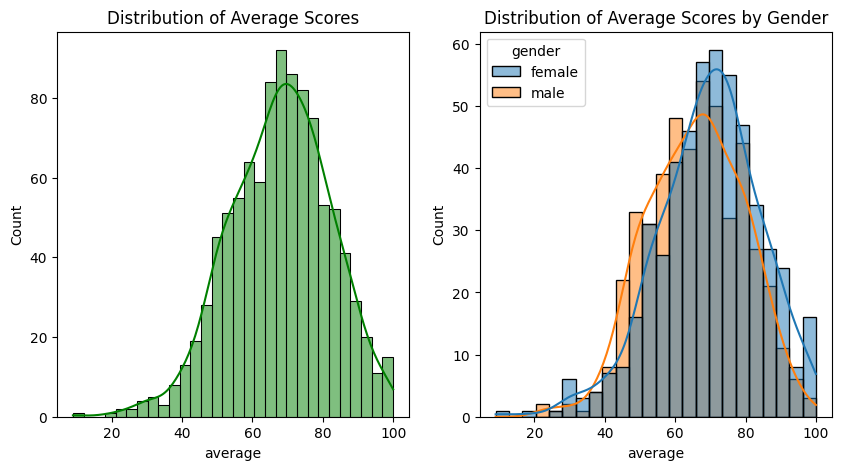

In [14]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histogram of average scores
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Distribution of Average Scores")

# Histogram of average scores with gender hue
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Distribution of Average Scores by Gender")

# Display plots
plt.show()


#####  **Insights**
- Female students tend to perform better than male students.

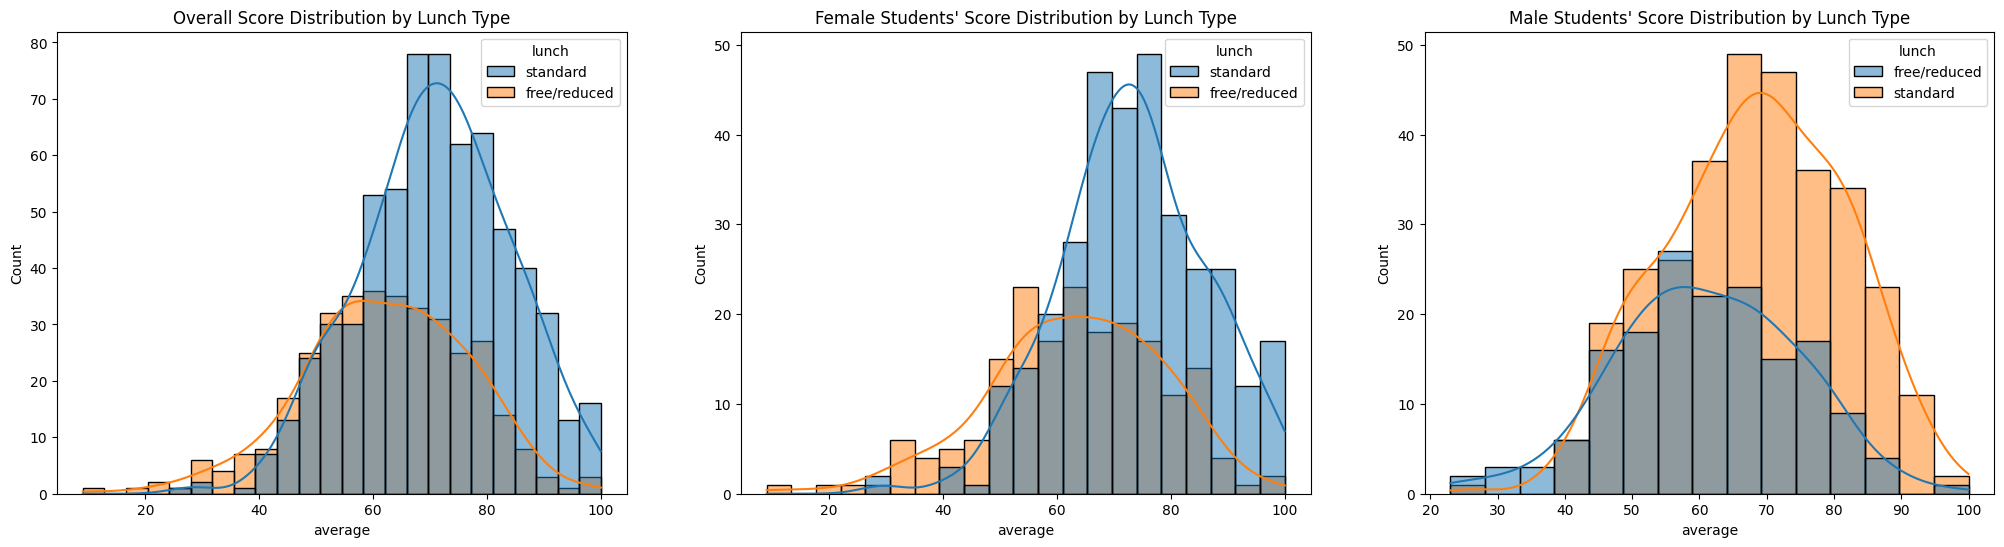

In [15]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Histogram for overall average scores based on lunch type
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title("Overall Score Distribution by Lunch Type")

# Histogram for female students' scores based on lunch type
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title("Female Students' Score Distribution by Lunch Type")

# Histogram for male students' scores based on lunch type
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title("Male Students' Score Distribution by Lunch Type")

# Adjust layout for better spacing
plt.show()


#####  **Insights**
- Students who receive standard lunch tend to perform better in exams.
- This trend holds for both male and female students.

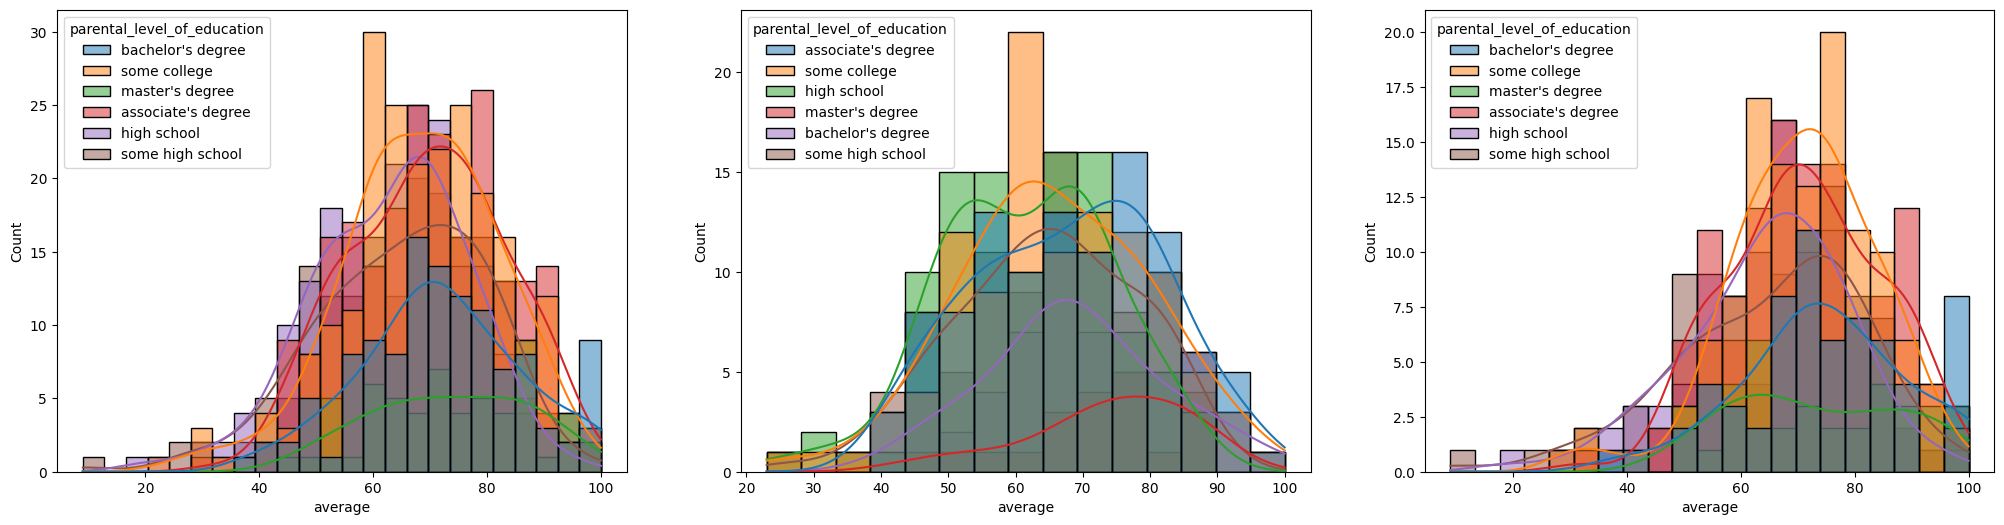

In [16]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')

plt.show()


#####  **Insights**
- Overall, parental education does not have a strong influence on student performance in exams.
- However, for male students, those whose parents have an associate's or master's degree tend to perform better.
- In contrast, female students' performance appears unaffected by their parents' education level.

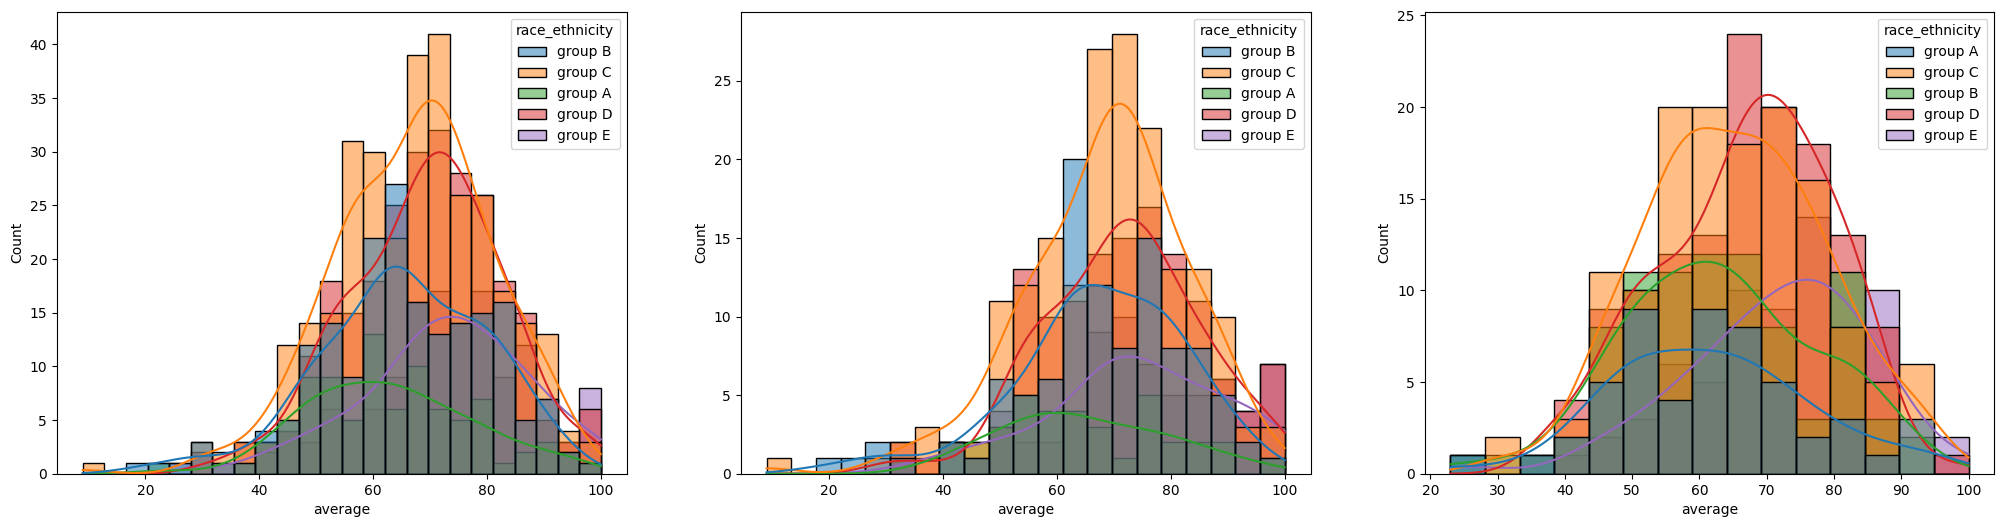

In [17]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')

plt.show()

#####  **Insights**
- Students belonging to Group A and Group B tend to have lower performance in exams.
- This trend remains consistent regardless of gender (both male and female students in these groups perform poorly).

##### **4.2 Maximum score of students in all the three subjects**

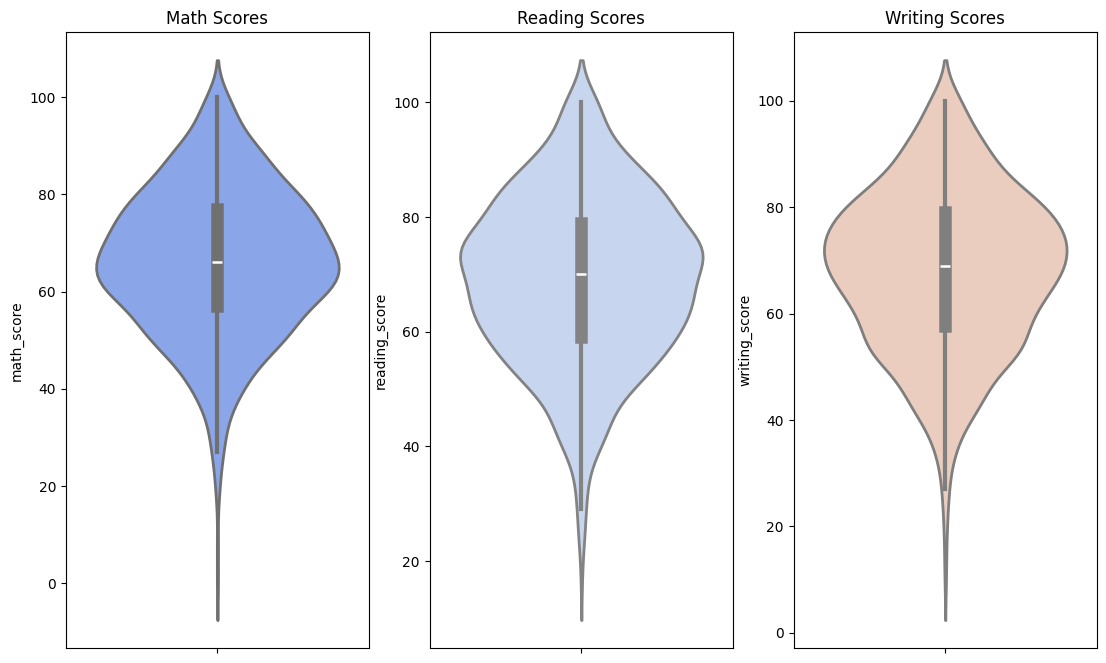

In [18]:
# Set the color palette
colors = sns.color_palette("coolwarm", 4)

plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color=colors[0], linewidth=2)

plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=df, color=colors[1], linewidth=2)

plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=df, color=colors[2], linewidth=2)

plt.show()


#### **Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### **4.3 Multivariate analysis using pieplot**

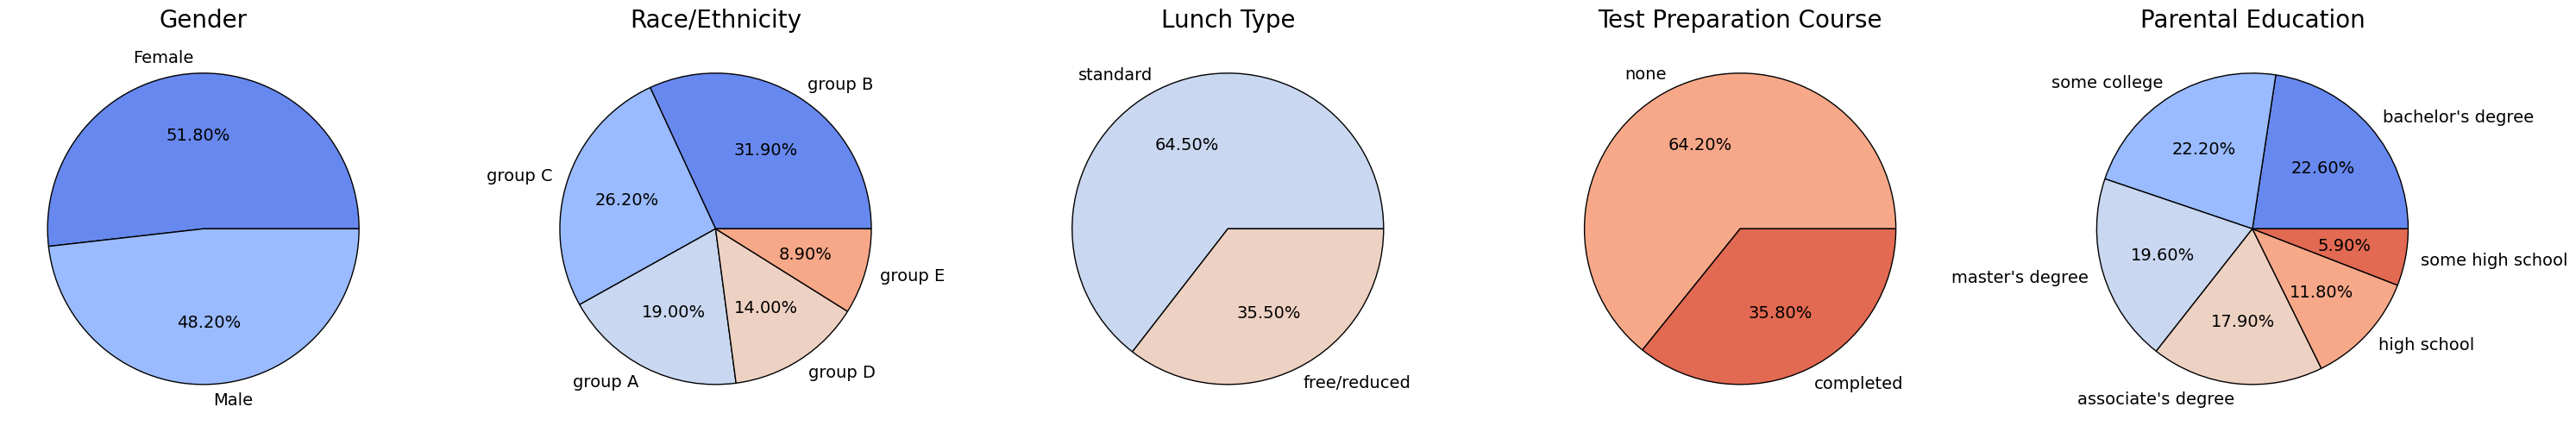

In [19]:
# Set figure size
plt.rcParams['figure.figsize'] = (30, 12)

color = sns.color_palette("coolwarm", 6)

# Define categories for each column dynamically
categories = {
    'gender': ('Gender', ['Female', 'Male'], [color[0], color[1]]),
    'race_ethnicity': ('Race/Ethnicity', df['race_ethnicity'].unique(), color[:5]),
    'lunch': ('Lunch Type', df['lunch'].unique(), [color[2], color[3]]),
    'test_preparation_course': ('Test Preparation Course', df['test_preparation_course'].unique(), 
                                [color[4], color[5]]),
    'parental_level_of_education': ('Parental Education', df['parental_level_of_education'].unique(), 
                                    color[:len(df['parental_level_of_education'].unique())])
}

# Create subplots
for idx, (col, (title, labels, colors)) in enumerate(categories.items(), start=1):
    plt.subplot(1, 5, idx)
    size = df[col].value_counts()
    
    plt.pie(size, labels=labels, colors=colors, autopct='%1.2f%%', 
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
    
    plt.title(title, fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


#####  **Insights**
- The number of male and female students is nearly equal.
- Most students belong to Group C.
- A majority of students have standard lunch.
- More students have not enrolled in any test preparation course.
- The highest number of students have parents with a "Some College" education, followed closely by those with an "Associate's Degree".

#### **4.4 Feature Wise Visualization**
#### **4.4.1 Gender Column**
- How is the gender distribution ?
- Is there any impact of gender on student's performance ?

##### **Univariate Analysis: Distribution of Gender**

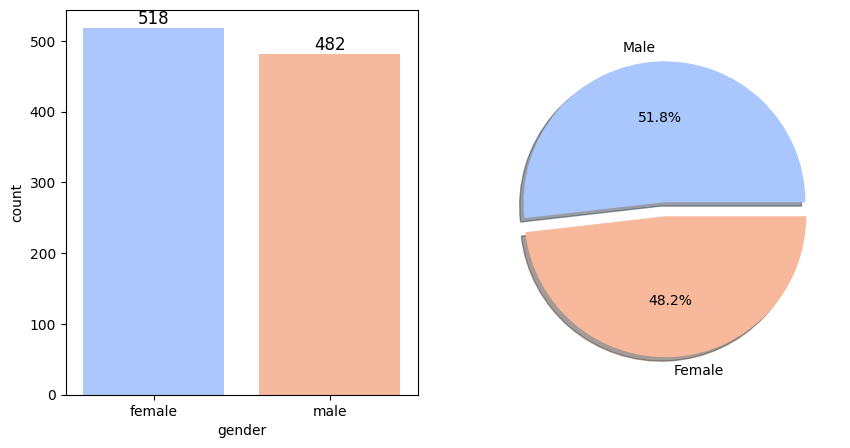

In [20]:
color = sns.color_palette("coolwarm", 2)

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x=df['gender'], data=df, palette=color, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12) 

plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], 
        explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=color)

plt.show()


##### **Insights** 
- Gender data is balanced, with 518 (48.2%) female students and 482 (51.8%) male students. 

##### **Bivariate Analysis: Does Gender Impact Student Performance?**


In [21]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


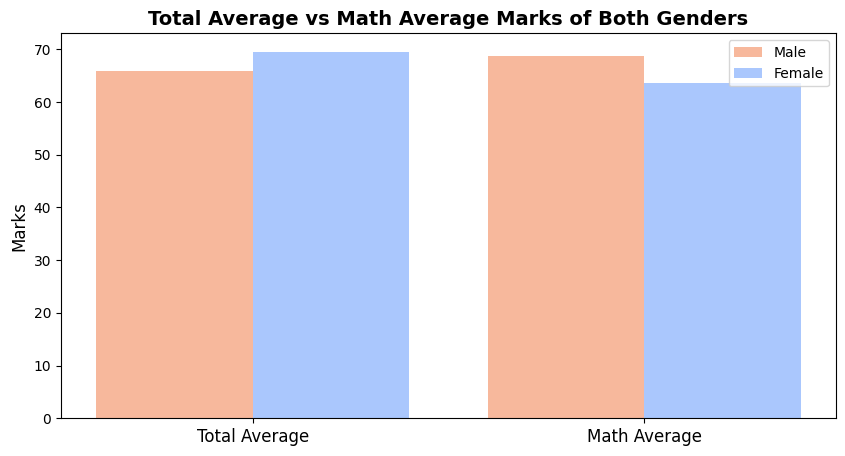

In [22]:
X = ['Total Average', 'Math Average']

# Extract scores for both genders
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
color = sns.color_palette("coolwarm", 2)

# Create figure
plt.figure(figsize=(10, 5))

# Bar plots
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color=color[1])  # Male color
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color=color[0])  # Female color
plt.xticks(X_axis, X, fontsize=12)
plt.ylabel("Marks", fontsize=12)
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold', fontsize=14)
plt.legend()

# Show plot
plt.show()


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### **4.4.1 Race/Ethnicity Column**
- How is the distribution of race/ethnicity column ?
- Is there any impact of race/ethnicity on student's performance ?

##### **Univariate Analysis**

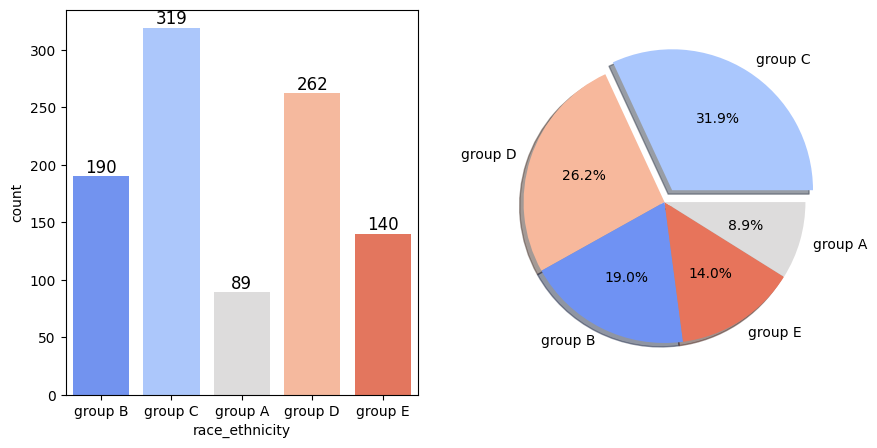

In [23]:
# Get unique categories
categories = df['race_ethnicity'].unique()

color_palette = sns.color_palette("coolwarm", len(categories))
color_mapping = dict(zip(categories, color_palette))

# Create figure and subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x=df['race_ethnicity'], data=df, palette=color_mapping, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

race_counts = df['race_ethnicity'].value_counts()
plt.pie(
    x=race_counts,
    labels=race_counts.index,
    explode=[0.1 if i == 0 else 0 for i in range(len(categories))],
    autopct='%1.1f%%',
    shadow=True,
    colors=[color_mapping[label] for label in race_counts.index]
)

plt.show()


##### **Insights** 
- Most of the representation is from group C and D, while group A is least represented.

##### **Bivariate Analysis**

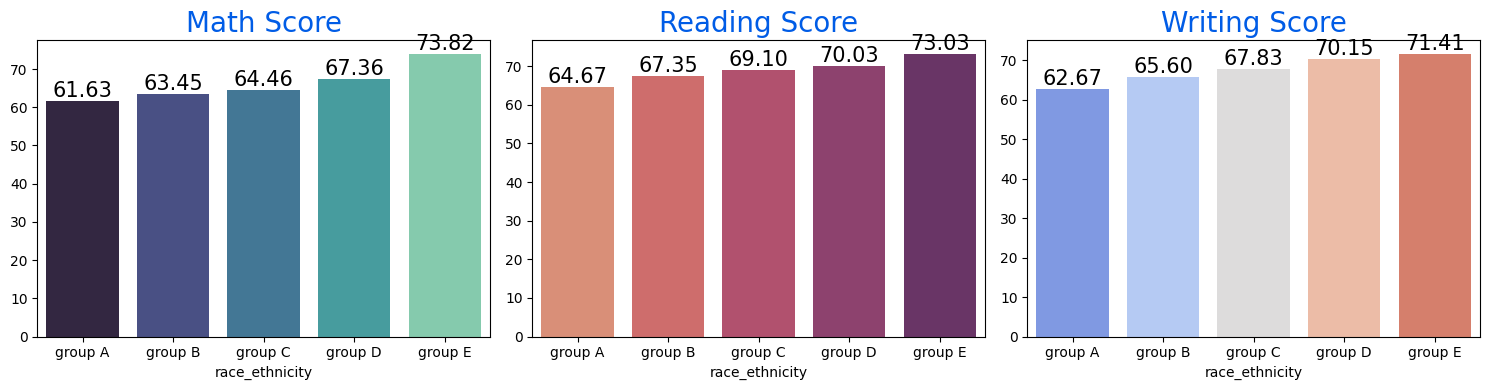

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(15, 4))

# Math Score
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%.2f", color='black', size=15)

# Reading Score
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%.2f", color='black', size=15)

# Writing Score
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, fmt="%.2f", color='black', size=15)

plt.tight_layout()
plt.show()


##### **Insights**
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socio-economic status have a lower average in all the subjects.

##### **4.4.3 Parental level of education column**

##### **Univariate Analysis**

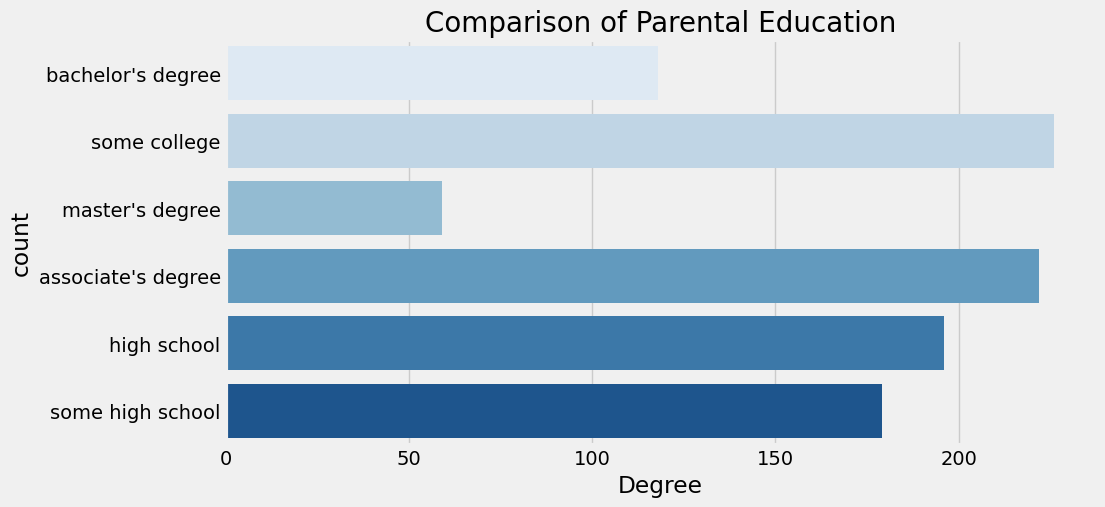

In [25]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### **Insights**
- Very few parents have a bachelor's and master's degree. 

##### **Bivariate Analysis**

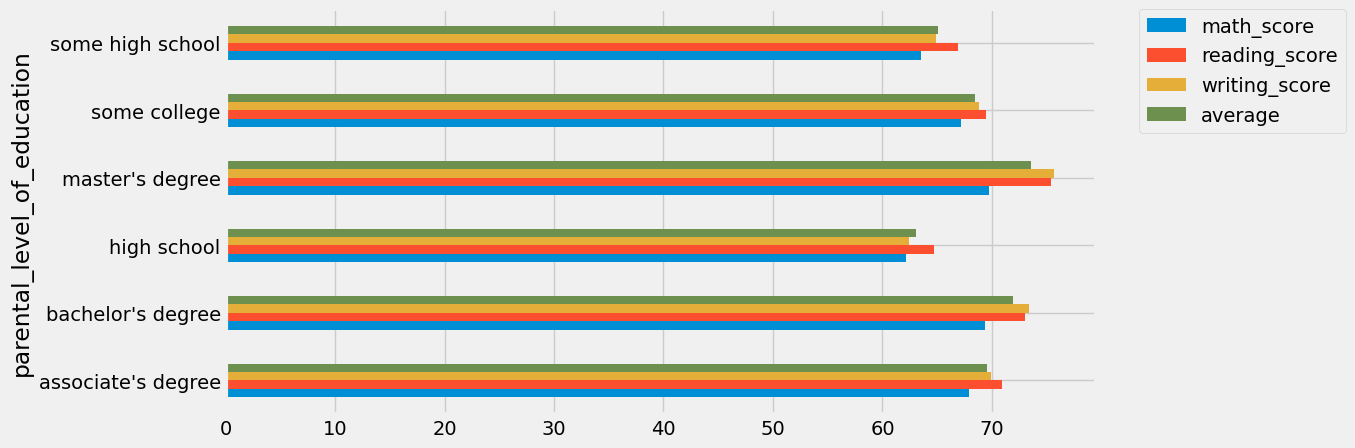

In [26]:
# Select only numeric columns for aggregation
df_numeric = df.select_dtypes(include=['number'])  

# Perform groupby and plot
df.groupby('parental_level_of_education')[df_numeric.columns].mean().plot(kind='barh', figsize=(10, 5))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


##### **Insights** 
- The score of students whose parents possess a master's and/or bachelor's degree are somewhat higher than others
- but doesn't play a great role in the overall scores.

##### **4.4.4 Lunch Column**

##### **Univariate Analysis**

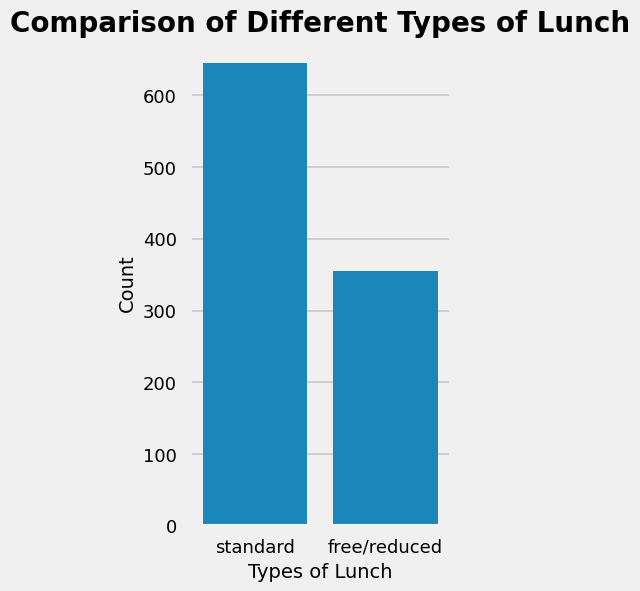

In [27]:
plt.figure(figsize=(3, 6))  # Set figure size here
plt.style.use('seaborn-talk')

sns.countplot(data=df, x='lunch')  # Use data parameter for better compatibility
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


##### **Insights** 
- More students are served Standard lunch compared to Free lunch.

##### **Bivariate Analysis**

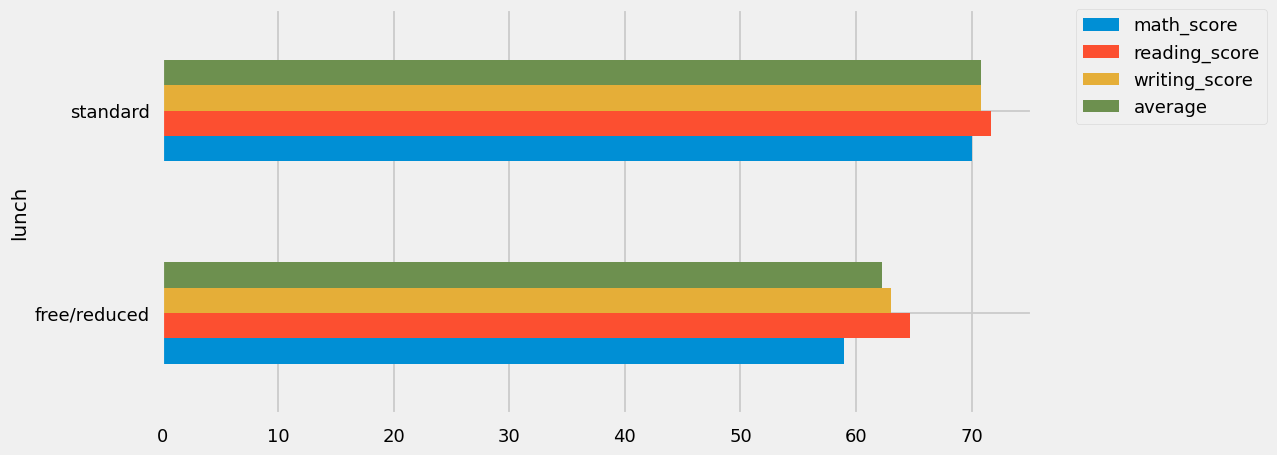

In [28]:
# Select only numeric columns for aggregation
df_numeric = df.select_dtypes(include=['number'])  

# Perform groupby and plot
df.groupby('lunch')[df_numeric.columns].mean().plot(kind='barh', figsize=(10, 5))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


##### **Insights**
- Students who get Standard Lunch tend to perform better than the students who get free/reduced lunch

##### **4.4.5 Test Preparation Course Column**

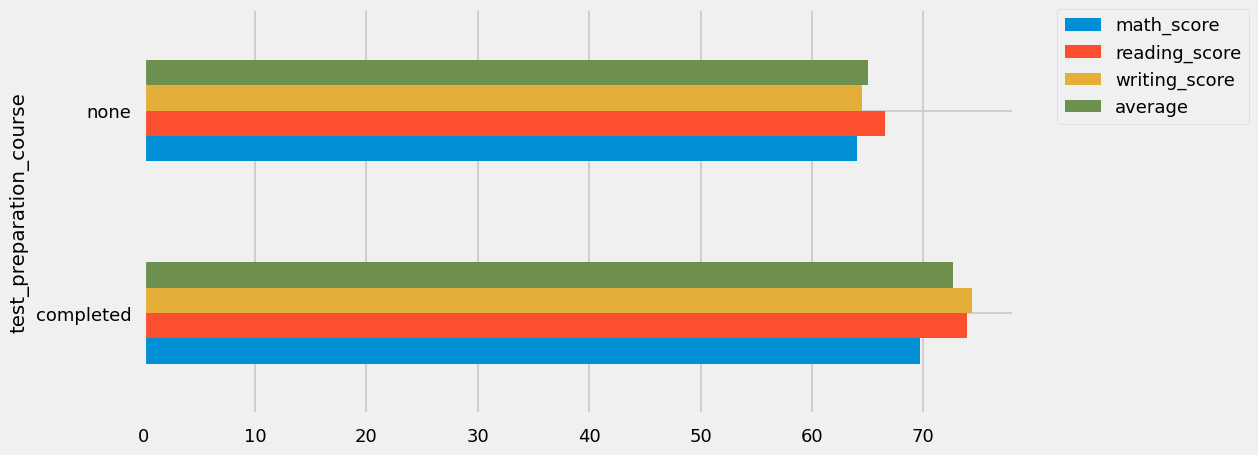

In [29]:
# Select only numeric columns for aggregation
df_numeric = df.select_dtypes(include=['number'])  

# Perform groupby and plot
df.groupby('test_preparation_course')[df_numeric.columns].mean().plot(kind='barh', figsize=(10, 5))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### **Insights**  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

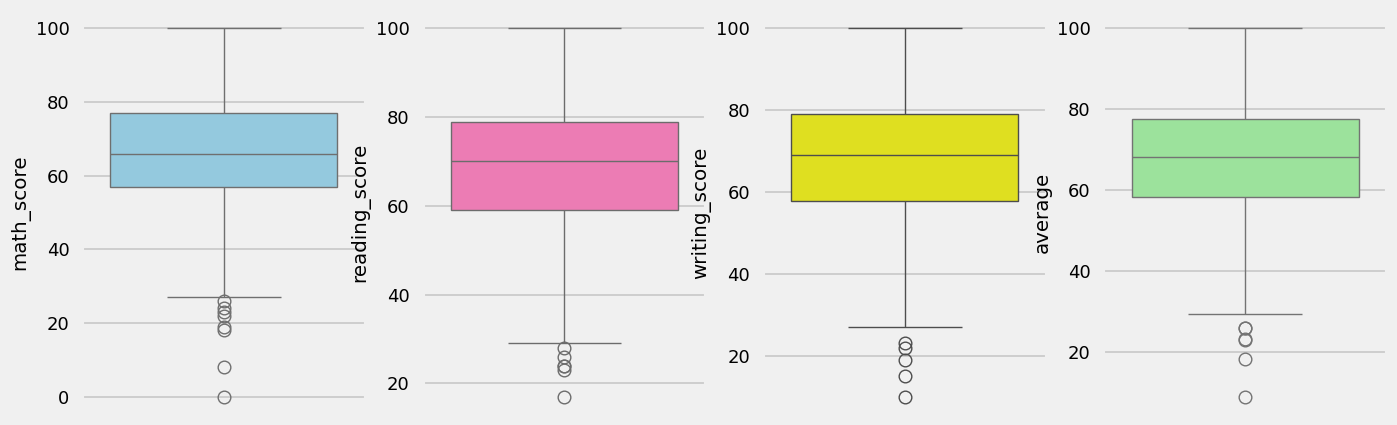

In [30]:
plt.subplots(1,4,figsize=(15,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

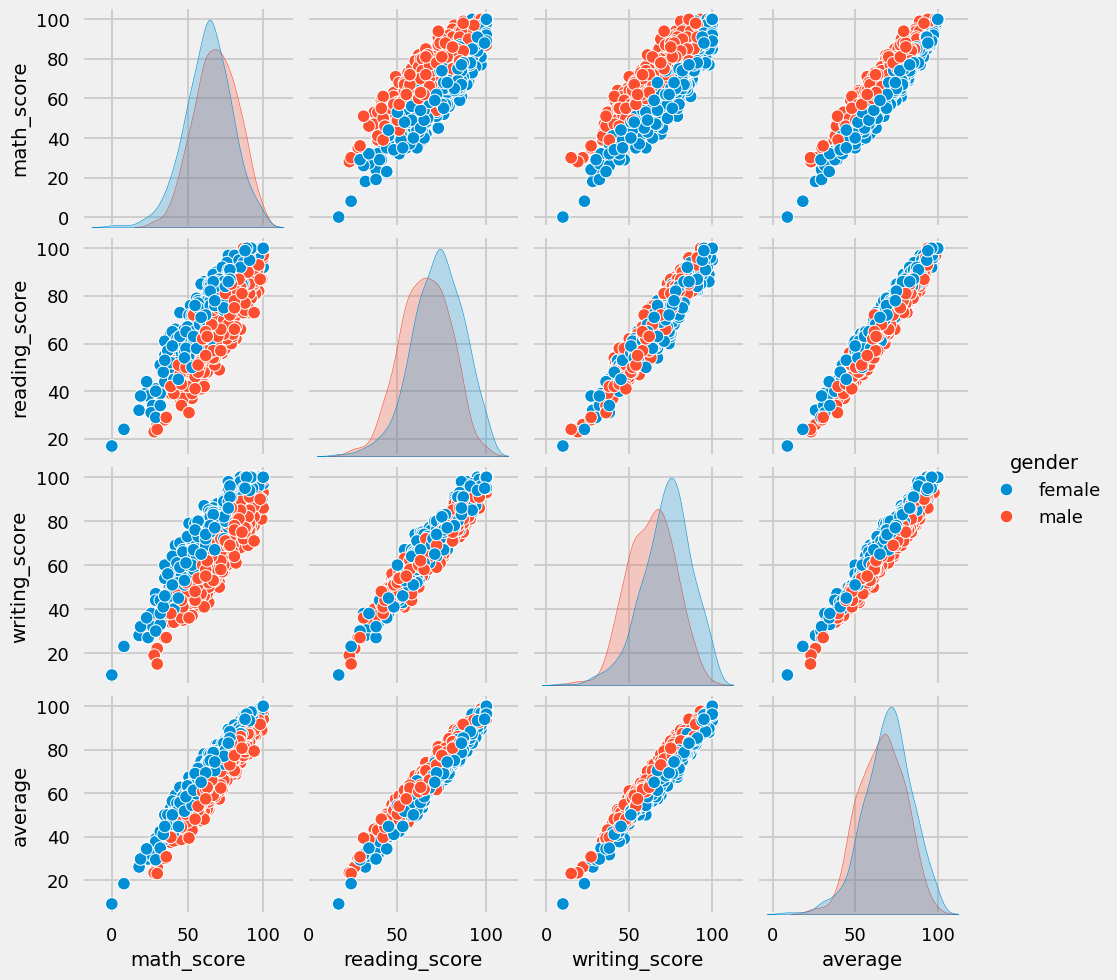

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parent's level of education.'
- Females lead in pass percentage and are also top-scorers
- Finishing preparation course is benefitial.